# Preprocessing

In [1]:
#Import Requird Libraries
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [2]:
data=pd.read_csv("Regression_data.csv")

## Handling Missing Values

In [3]:
#Handle Missing Values
data.replace(['', ' ', 'NULL'], pd.NA, inplace=True)

data_cleaned = data.dropna(subset=['Gender'])  # Remove rows where 'Gender' is missing
data['Property Location'].fillna('Unknown', inplace=True)
data['Has Active Credit Card'].fillna('Unknown', inplace=True)
data['Type of Employment'].fillna('Unknown', inplace=True)
data['Gender'].fillna('Unknown', inplace=True)
data['Income Stability'].fillna('Unknown', inplace=True)
data['Income (USD)'] = pd.to_numeric(data['Income (USD)'], errors='coerce')
data['Income (USD)'].fillna(data['Income (USD)'].mean(), inplace=True)
data['Property Age'] = pd.to_numeric(data['Property Age'], errors='coerce')
data['Property Age'].fillna(data['Property Age'].mean(), inplace=True)
data['Credit Score'] = pd.to_numeric(data['Credit Score'], errors='coerce')
data['Credit Score'].fillna(data['Credit Score'].mean(), inplace=True)
data['Dependents'].fillna(0, inplace=True)
data['Current Loan Expenses (USD)'] = pd.to_numeric(data['Current Loan Expenses (USD)'], errors='coerce')
data['Current Loan Expenses (USD)'].fillna(data['Current Loan Expenses (USD)'].mean(), inplace=True)
data['Loan Sanction Amount (USD)'] = pd.to_numeric(data['Loan Sanction Amount (USD)'], errors='coerce')
data['Loan Sanction Amount (USD)'].fillna(data['Loan Sanction Amount (USD)'].mean(), inplace=True)

missing_values = data.isnull().sum()
print("Missing Values After Replacement:")
print(missing_values)

Missing Values After Replacement:
Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64


## Handling Duplicate Values

### To remove duplicate values
### Use data_cleaned = data.drop_duplicates()
### NO NEED TO HANDLE DUPLICATE VALUES,as there are no duplicate values in this data

## Handling Noise

In [4]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
z_scores = zscore(numeric_data, nan_policy='omit')  # Ignore NaNs in z-score calculation
outliers_zscore = (z_scores > 3) | (z_scores < -3)
clean_data = data[~outliers_zscore.any(axis=1)]  # Keep rows without outliers
num_outliers_zscore = outliers_zscore.sum(axis=0)
print("\nOutliers (Z-score):")
print(f'Number of outliers per column (Z-score):\n{num_outliers_zscore}')
print("\nCleaned Data (First 10 Rows):")
print(clean_data.head(10))


Outliers (Z-score):
Number of outliers per column (Z-score):
Age                              0
Income (USD)                     4
Loan Amount Request (USD)      394
Current Loan Expenses (USD)    367
Dependents                      60
Credit Score                     0
No. of Defaults                  0
Property ID                      0
Property Age                     4
Property Type                    0
Co-Applicant                   168
Property Price                 405
Loan Sanction Amount (USD)     366
dtype: int64

Cleaned Data (First 10 Rows):
  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56   1933.050000              Low   
1     C-33999  America Calderone      M   32   4952.910000              Low   
2      C-3770      Rosetta Verne      F   65    988.190000             High   
3     C-26480         Zoe Chitty      F   65   2630.574417             High   
4     C-23459       Afton Venema      F   31

## Lable Encoding

In [5]:
# Label Encoding for categorical columns
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
clean_data['Gender'] = label_encoder.fit_transform(clean_data['Gender'])
clean_data['Property Location'] = label_encoder.fit_transform(clean_data['Property Location'])
clean_data['Type of Employment'] = label_encoder.fit_transform(clean_data['Type of Employment'])
clean_data['Income Stability'] = label_encoder.fit_transform(clean_data['Income Stability'])
clean_data['Profession'] = label_encoder.fit_transform(clean_data['Profession'])
clean_data['Location'] = label_encoder.fit_transform(clean_data['Location'])
clean_data['Expense Type 1'] = label_encoder.fit_transform(clean_data['Expense Type 1'])
clean_data['Expense Type 2'] = label_encoder.fit_transform(clean_data['Expense Type 2'])
clean_data['Has Active Credit Card'] = label_encoder.fit_transform(clean_data['Has Active Credit Card'])

## Find Feature Importance

0.765018413537643


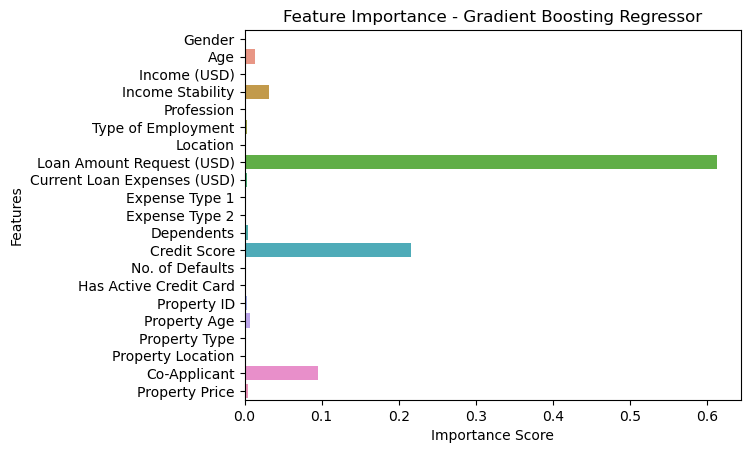

In [6]:
#ML model
x=clean_data.drop(["Customer ID","Name","Loan Sanction Amount (USD)"],axis=1)
y=clean_data["Loan Sanction Amount (USD)"]
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#model training
model=GradientBoostingRegressor(random_state=42,learning_rate=0.05, max_depth= 5, min_samples_leaf= 1, min_samples_split=2,n_estimators= 100, subsample= 0.8)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)
gb_importance = model.feature_importances_
features = x.columns

sns.barplot(x=gb_importance, y=features)
plt.title("Feature Importance - Gradient Boosting Regressor")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Based on the feature importance ,select the features to be used to train the model
### The features which will be dropped are: "Customer ID","Name","Loan Sanction Amount (USD)","Gender","Profession","Location","Expense Type 1","Expense Type 2"

In [7]:
#ML model
x=clean_data.drop(["Customer ID","Name","Loan Sanction Amount (USD)","Gender","Profession","Location","Expense Type 1","Expense Type 2"],axis=1)
y=clean_data["Loan Sanction Amount (USD)"]
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#model training
model=GradientBoostingRegressor(random_state=42,learning_rate=0.05, max_depth= 5, min_samples_leaf= 1, min_samples_split=2,n_estimators= 100, subsample= 0.8)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7656664982724276
